In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
sns.color_palette('viridis', as_cmap=True)

In [68]:
df = pd.read_csv('reagent_calculator_input.csv')

In [69]:
num_cycles = 20
quench_period_dict = {0.5: str(num_cycles/0.5),
                     1: str(num_cycles/1),
                     2: str(num_cycles/2),
                     5: str(num_cycles/5),
                     20: str(num_cycles/20)}

In [70]:
df.head()

,esiv,react_volume_overshoot,img_overshoot,wash_overshoot,quencher_period,well_plate,interweaving,AP,SP,Img,quencher,total_wells_req,plates_req,largest_reservoir,waste_mL
0,700.0,1.15,2.05,2.15,0.5,1700.0,0.0,20,20,42,40,122,2.0,624,1701
1,750.0,1.15,2.05,2.15,0.5,1700.0,0.0,20,20,42,40,122,2.0,667,1809
2,800.0,1.15,2.05,2.15,0.5,1700.0,0.0,40,40,42,80,202,3.0,710,1916
3,850.0,1.15,2.05,2.15,0.5,1700.0,0.0,40,40,84,80,244,3.0,753,2023
4,900.0,1.15,2.05,2.15,0.5,1700.0,0.0,40,40,84,80,244,3.0,796,2130


In [71]:
df['num_quenches'] = [quench_period_dict[a] for a in df['quencher_period']]
df_1700 = df.loc[(df['well_plate']==1700) & (df['interweaving']==0)].copy()
# df_1700['num_quenches'] = [quench_period_dict[a] for a in df_1700['quencher_period']]
df_1800 = df.loc[(df['well_plate']==1800) & (df['interweaving']==0)].copy()
# df_1800['num_quenches'] = [quench_period_dict[a] for a in df_1800['quencher_period']]

In [72]:
df_1700.head()

,esiv,react_volume_overshoot,img_overshoot,wash_overshoot,quencher_period,well_plate,interweaving,AP,SP,Img,quencher,total_wells_req,plates_req,largest_reservoir,waste_mL,num_quenches
0,700.0,1.15,2.05,2.15,0.5,1700.0,0.0,20,20,42,40,122,2.0,624,1701,40.0
1,750.0,1.15,2.05,2.15,0.5,1700.0,0.0,20,20,42,40,122,2.0,667,1809,40.0
2,800.0,1.15,2.05,2.15,0.5,1700.0,0.0,40,40,42,80,202,3.0,710,1916,40.0
3,850.0,1.15,2.05,2.15,0.5,1700.0,0.0,40,40,84,80,244,3.0,753,2023,40.0
4,900.0,1.15,2.05,2.15,0.5,1700.0,0.0,40,40,84,80,244,3.0,796,2130,40.0


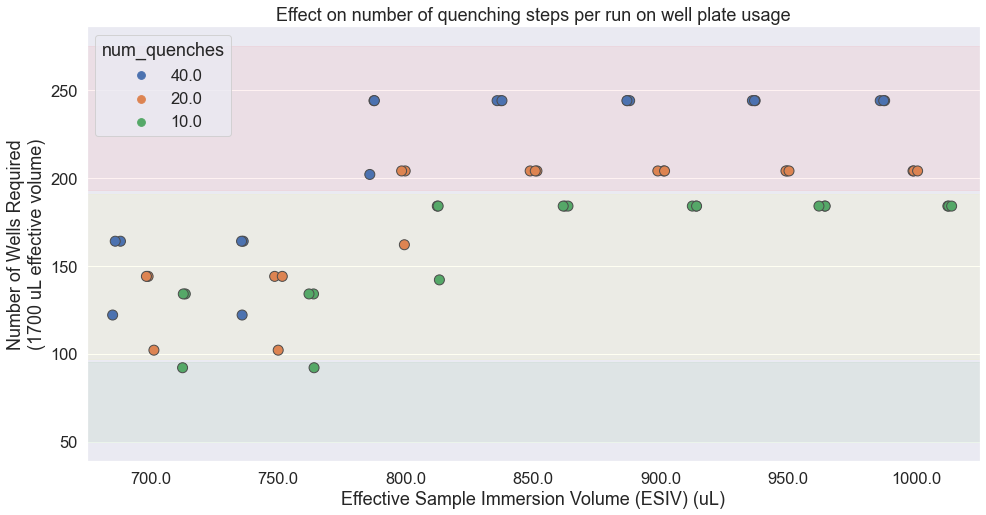

In [73]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.axhspan(50, 95, color='green', alpha=0.05)
ax.axhspan(97, 191, color='yellow', alpha=0.05)
ax.axhspan(193, 275, color='red', alpha=0.05)
sns.stripplot(data=df_1700, x='esiv', y='total_wells_req', hue='num_quenches',
              jitter=True, dodge=True, size=10, linewidth=1)
ax.set(xlabel='Effective Sample Immersion Volume (ESIV) (uL)',
      ylabel='Number of Wells Required\n(1700 uL effective volume)',
      title='Effect on number of quenching steps per run on well plate usage')
plt.show()

In [74]:
df_1700 = df.loc[df['well_plate']==1700].copy()
df_1800 = df.loc[df['well_plate']==1800].copy()

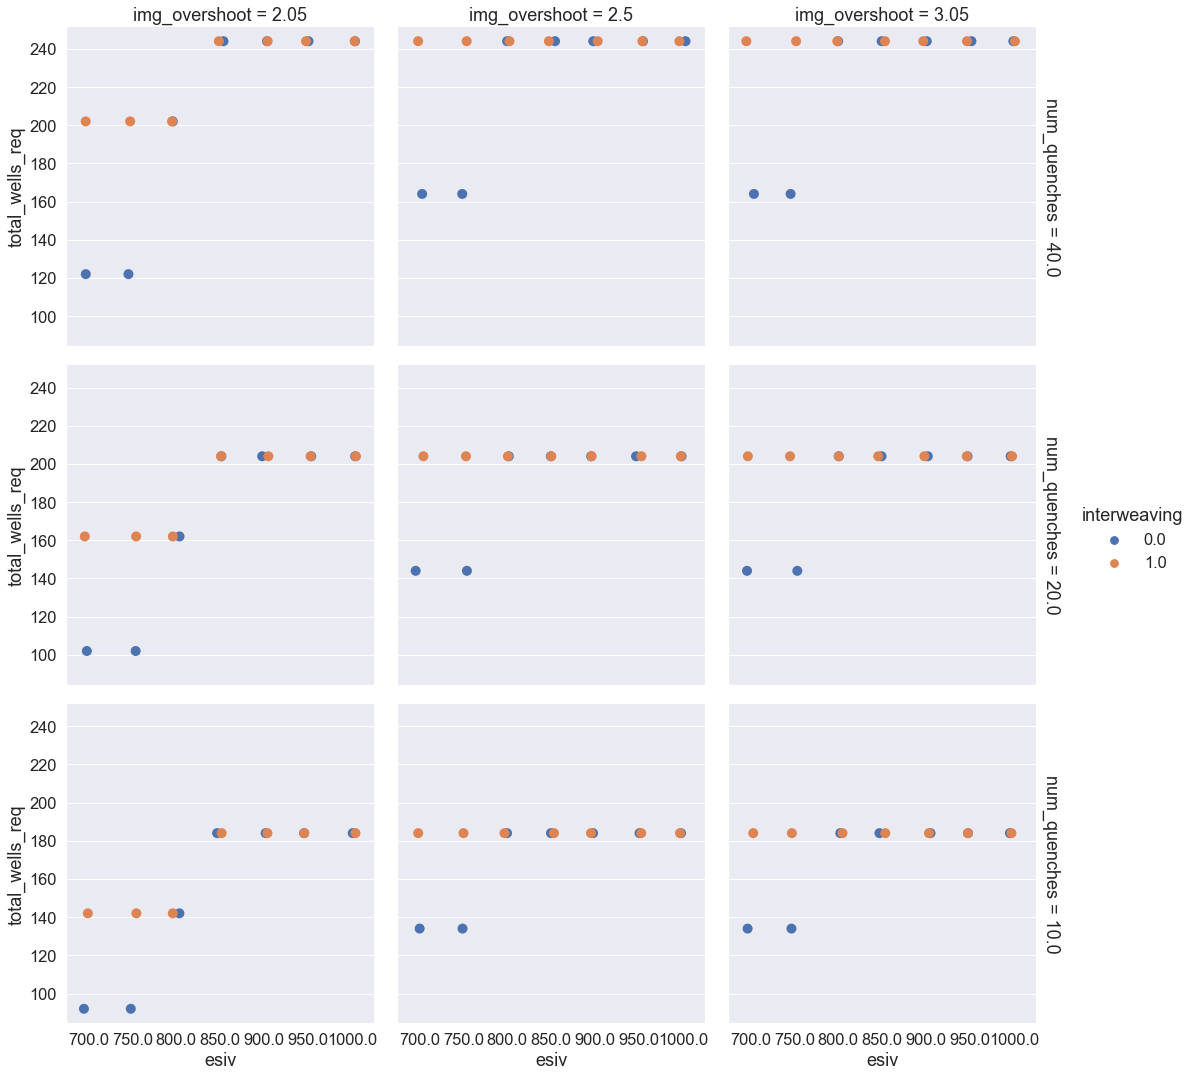

In [75]:
sns.catplot(data=df_1700, x='esiv', y='total_wells_req', hue='interweaving', 
            row='num_quenches', col='img_overshoot', 
            kind='strip', margin_titles=True, s=10)

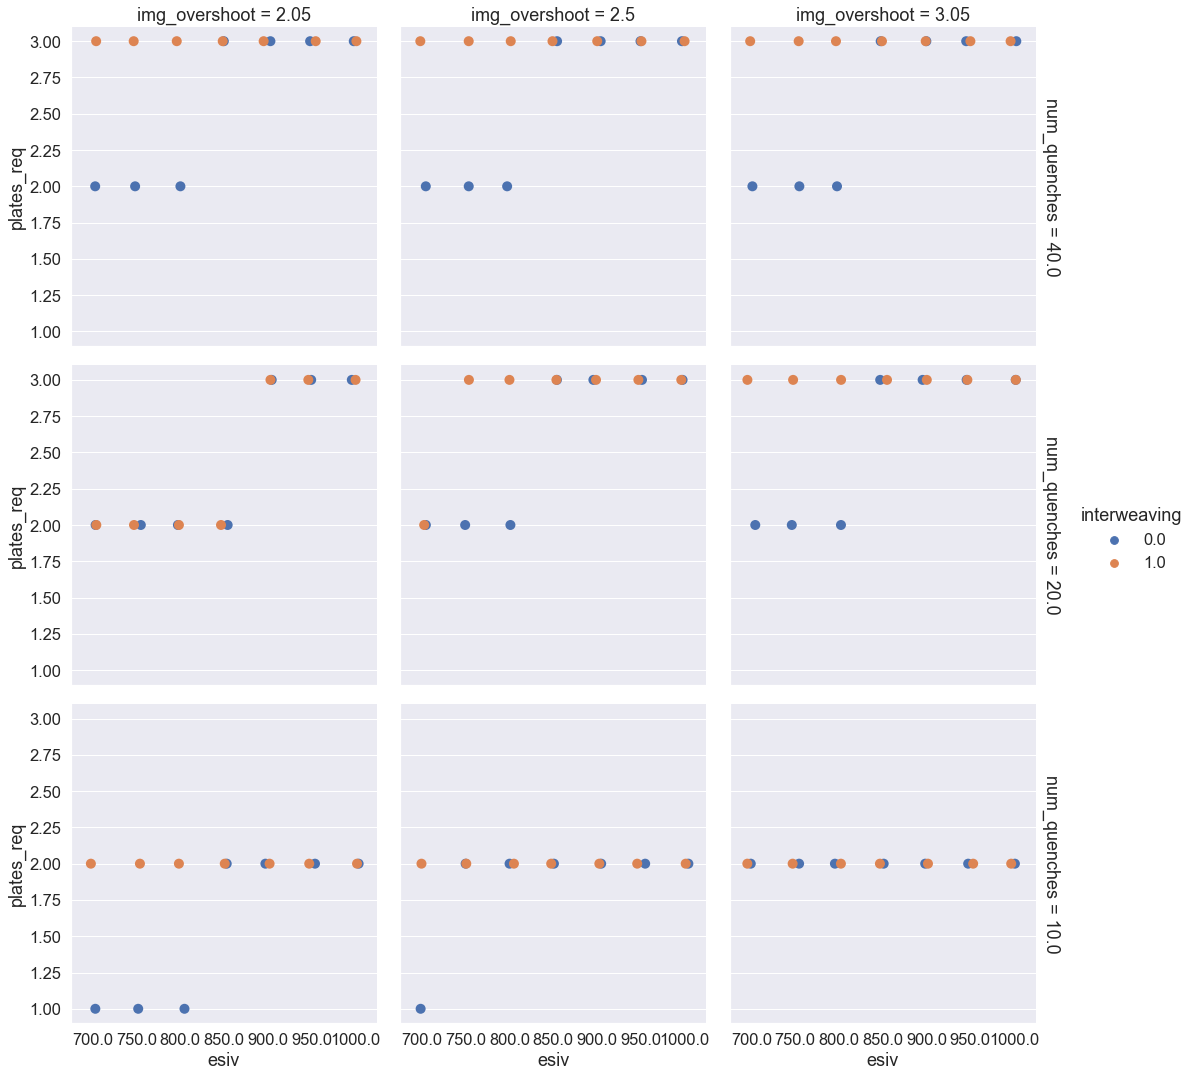

In [76]:
sns.catplot(data=df_1800, x='esiv', y='plates_req', hue='interweaving', 
            row='num_quenches', col='img_overshoot', 
            kind='strip', margin_titles=True, s=10)